# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import f1_score

import pickle

# Import Dataset

In [2]:
data_train = pd.read_csv('train_PDjVQMB.csv')
data_test = pd.read_csv('test_lTY72QC.csv')
data_train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


# Analyse Data

In [3]:
data_train.shape

(6650, 11)

In [4]:
# checking for null values
data_train.isnull().sum()
# Observation - 
# No Null Values

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [5]:
# All features value counts 

features = ['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 
            'Credit_Card', 'Credit_Category', 'Is_Churn' ]

[str(f) + ' - ' + str(data_train[f].nunique()) for f in features]


['ID - 6650',
 'Age - 52',
 'Gender - 2',
 'Income - 4',
 'Balance - 6643',
 'Vintage - 6',
 'Transaction_Status - 2',
 'Product_Holdings - 3',
 'Credit_Card - 2',
 'Credit_Category - 3',
 'Is_Churn - 2']

# STEP 1 : Check correlation between features

In [6]:
#1. Age
data_train['Age'].value_counts()

39    306
38    284
36    282
40    277
35    271
33    267
34    256
41    256
37    248
42    233
32    226
43    224
45    218
31    217
44    213
30    198
46    193
47    189
29    179
28    150
49    149
48    149
50    147
51    135
52    132
27    128
53    111
26    101
55     97
54     94
56     88
57     73
60     62
59     58
58     55
25     49
62     40
63     35
65     35
64     34
24     33
61     32
66     30
23     25
68     16
67     15
22     12
71     10
69      9
70      4
72      3
21      2
Name: Age, dtype: int64

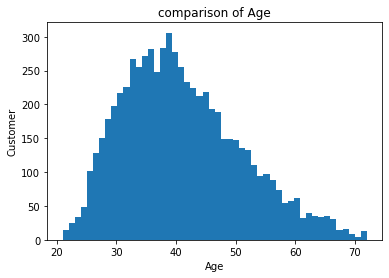

In [7]:
#1. Age
plt.hist(x = data_train.Age, bins = 50)
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('Customer')
plt.show()

#Observation
#Numerical - Left Skewed

In [8]:
#2. Gender
data_train['Gender'].value_counts()

Male      3612
Female    3038
Name: Gender, dtype: int64

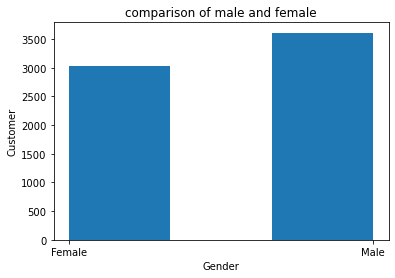

In [9]:

plt.hist(x = data_train.Gender, bins = 3)
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('Customer')
plt.show()

#Observation
#Categorical 
#No major bias

In [10]:
#3.Income
data_train['Income'].value_counts()

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

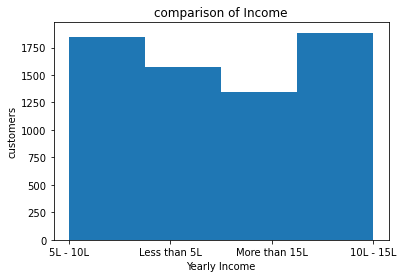

In [11]:

plt.hist(x = data_train.Income, bins = 4)
plt.title('comparison of Income')
plt.xlabel('Yearly Income')
plt.ylabel('customers')
plt.show()

#Observation
#Categorical 
#No major bias

In [12]:
#4.Balance
data_train['Balance'].value_counts()

#Observation
#Ignore Feature

117549.00     2
76122.00      2
131121.00     2
102123.00     2
138825.00     2
             ..
289348.92     1
1031298.48    1
242901.27     1
719339.85     1
826947.27     1
Name: Balance, Length: 6643, dtype: int64

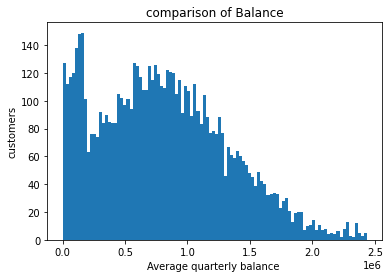

In [13]:
plt.hist(x = data_train.Balance, bins = 100)
plt.title('comparison of Balance')
plt.xlabel('Average quarterly balance ')
plt.ylabel('customers')
plt.show()

#Observation
#Categorical 
#Lekt Skewed distribution
#Ingnore Feature - 99.9# Unique values

In [14]:
#5.Vintage
data_train['Vintage'].value_counts()

3    1405
1    1354
2    1328
4    1296
0     956
5     311
Name: Vintage, dtype: int64

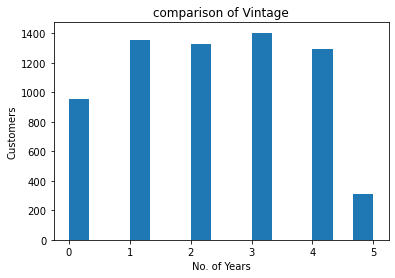

In [15]:
plt.hist(x = data_train.Vintage, bins = 15)
plt.title('comparison of Vintage')
plt.xlabel('No. of Years')
plt.ylabel('Customers')
plt.show()

#Observation
#Categorical 
#No major bias

In [16]:
#6. Transaction_Status
data_train['Transaction_Status'].value_counts()

1    3430
0    3220
Name: Transaction_Status, dtype: int64

Text(0, 0.5, 'Customer')

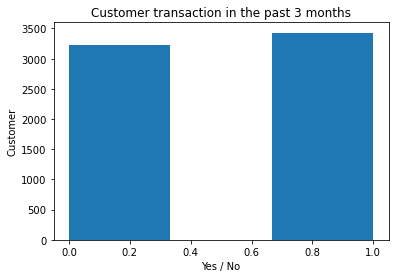

In [17]:
plt.hist(x = data_train.Transaction_Status, bins = 3)
plt.title('Customer transaction in the past 3 months')
plt.xlabel('Yes / No')
plt.ylabel('Customer')
#Observation
#Categorical
#No major bias

In [18]:
#7. Product Holdings
data_train['Product_Holdings'].value_counts()

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64

Text(0, 0.5, 'Customers')

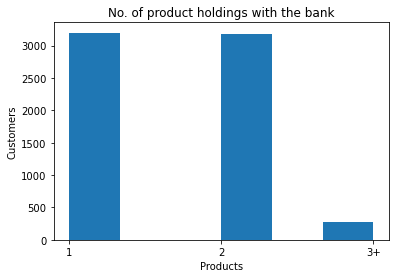

In [19]:
plt.hist(x = data_train.Product_Holdings, bins=6)
plt.title('No. of product holdings with the bank')
plt.xlabel('Products')
plt.ylabel('Customers')

#Observation
#Categorical
#High Cardinality @ +3

In [20]:
#8. Credit_Card
data_train['Credit_Card'].value_counts()

1    4418
0    2232
Name: Credit_Card, dtype: int64

Text(0, 0.5, 'Customers')

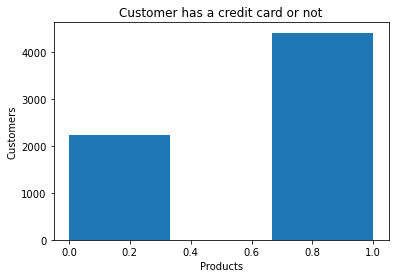

In [21]:
plt.hist(x = data_train.Credit_Card, bins=3)
plt.title('Customer has a credit card or not')
plt.xlabel('Products')
plt.ylabel('Customers')
#Observation
#Categorical
#50% difference 

In [22]:
#9.Credit_Category
data_train['Credit_Category'].value_counts()

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

Text(0, 0.5, 'Customers')

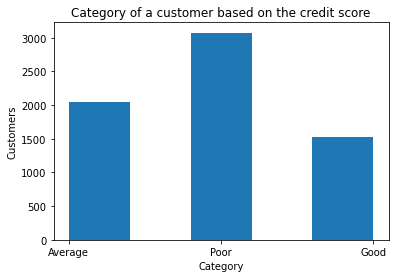

In [23]:
plt.hist(x = data_train.Credit_Category, bins=5)
plt.title('Category of a customer based on the credit score')
plt.xlabel('Category')
plt.ylabel('Customers')

#Observation
#Categorical
#No major bias

In [24]:
data_train.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn'],
      dtype='object')

# STEP 2 : Data Cleaning and Preparation
# 2.1. Removing unnecesarry features

In [25]:
# Removing the ID and Blalance features from the dataset
data_train = data_train.drop(['ID', 'Balance'], axis=1)
data_test = data_test.drop(['ID', 'Balance'], axis=1)

In [26]:
data_train.head()

,Age,Gender,Income,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,4,0,1,0,Average,1
1,53,Female,Less than 5L,2,1,1,1,Poor,0
2,35,Female,More than 15L,2,1,2,0,Poor,0
3,43,Female,More than 15L,0,1,2,1,Poor,1
4,39,Female,More than 15L,1,1,1,1,Good,1


# 2.2. Encoding Categorical Features into numerical variables using label encoder

Note: Gender, Income, Credit_Category, Product_Holding are encoded.

In [27]:
# Importing LabelEncoder from Sklearn
# Transforming Gender column values using label Encoder
from sklearn.preprocessing import LabelEncoder
label_encoder_Gender = LabelEncoder()

In [28]:
# Get the location of Gender in data_train or data_test
data_train.iloc[:,1:2]

,Gender
0,Female
1,Female
2,Female
3,Female
4,Female
...,...
6645,Male
6646,Female
6647,Male
6648,Female


In [29]:
#Apply transformation to Gender field
data_train.iloc[:,1:2]  = label_encoder_Gender.fit_transform(data_train.iloc[:,1:2])
data_test.iloc[:,1:2]  = label_encoder_Gender.fit_transform(data_test.iloc[:,1:2])


/Users/deepthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# Check the transformation
data_train['Gender'].value_counts(), data_test['Gender'].value_counts()

(1    3612
 0    3038
 Name: Gender, dtype: int64,
 1    1545
 0    1306
 Name: Gender, dtype: int64)

In [31]:
# Transforming Income column values using label Encoder
label_encoder_Income = LabelEncoder()

In [32]:
#data_train.iloc[:,2:3]
data_train['Income'].value_counts()

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

In [33]:
data_train.iloc[:,2:3]  = label_encoder_Income.fit_transform(data_train.iloc[:,2:3])
data_test.iloc[:,2:3]  = label_encoder_Income.fit_transform(data_test.iloc[:,2:3])


In [34]:
# Check the transformation
data_train['Income'].value_counts(),data_test['Income'].value_counts()

(0    1885
 1    1847
 2    1573
 3    1345
 Name: Income, dtype: int64,
 0    844
 1    794
 2    648
 3    565
 Name: Income, dtype: int64)

In [35]:
# Transforming Credit_Category column values using label Encoder
label_encoder_Credit_Category = LabelEncoder()

In [36]:
#data_train.iloc[:,-2:-1]
data_train['Credit_Category'].value_counts()

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

In [37]:
data_train.iloc[:,-2:-1] = label_encoder_Credit_Category.fit_transform(data_train.iloc[:,-2:-1])

data_test.iloc[:,-1:] = label_encoder_Credit_Category.fit_transform(data_test.iloc[:,-1:])



In [38]:
# Check the transformation
data_train['Credit_Category'].value_counts(),data_test['Credit_Category'].value_counts()


(2    3076
 0    2043
 1    1531
 Name: Credit_Category, dtype: int64,
 2    1270
 0     866
 1     715
 Name: Credit_Category, dtype: int64)

In [39]:
# Transforming Product_Holdings column values using label Encoder
label_encoder_Product_Holdings = LabelEncoder()

In [40]:
#data_train.iloc[:,5:6]
data_train['Product_Holdings'].value_counts()

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64

In [41]:
data_train.iloc[:,5:6]  = label_encoder_Product_Holdings.fit_transform(data_train.iloc[:,5:6])
data_test.iloc[:,5:6]  = label_encoder_Credit_Category.fit_transform(data_test.iloc[:,5:6])



In [42]:
# Check the transformation
data_train['Product_Holdings'].value_counts(), data_test['Product_Holdings'].value_counts()


(0    3200
 1    3182
 2     268
 Name: Product_Holdings, dtype: int64,
 1    1359
 0    1342
 2     150
 Name: Product_Holdings, dtype: int64)

In [44]:
# Check the final transformation
data_train.head()

,Age,Gender,Income,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,0,1,4,0,0,0,0,1
1,53,0,2,2,1,0,1,2,0
2,35,0,3,2,1,1,0,2,0
3,43,0,3,0,1,1,1,2,1
4,39,0,3,1,1,0,1,1,1


# Step 3 : Split the training data to independent fetures and dependent feature

In [62]:
# All features are independent features except Is_Churn
# x - independent features
# y - dependent features

x = data_train.iloc[:,:-1] # All features except Is_Churn
y = data_train.iloc[:,-1:] # Is_Churn

In [46]:
#Looking at shape and size of data
print(x.shape)
print(y.shape)

print(x.columns)
print(y.columns)

(6650, 8)
(6650, 1)
Index(['Age', 'Gender', 'Income', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category'],
      dtype='object')
Index(['Is_Churn'], dtype='object')


# Step 4 : Splitting the training data into training and testing set

In [47]:
# Splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4987, 8)
(4987, 1)
(1663, 8)
(1663, 1)


# Step 5 : Feature Scaling/ Trasformation

In [48]:
# Only on Independent Variable to convert them into values ranging from -1 to +1
# Using Standard Scalar to normalise our data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()


,0,1,2,3,4,5,6,7
0,-0.848876,-1.094037,-1.242871,0.53008,-1.043244,-0.980938,0.707000,0.972526
1,-1.056535,0.914046,-1.242871,0.53008,-1.043244,-0.980938,0.707000,-1.343056
2,1.020058,-1.094037,0.578789,0.53008,-1.043244,-0.980938,0.707000,0.972526
3,1.539207,0.914046,-1.242871,-0.15726,-1.043244,0.768057,0.707000,-1.343056
4,-0.848876,-1.094037,-0.332041,-0.15726,-1.043244,-0.980938,-1.414426,0.972526


In [49]:
data_test = sc.fit_transform(data_test)
data_test = pd.DataFrame(data_test)
data_test.head()

,0,1,2,3,4,5,6,7
0,0.909802,-1.087659,1.521174,-0.148337,0.986413,0.708217,0.703575,-1.337061
1,-0.546246,0.919406,-0.297982,-0.148337,-1.013774,0.708217,0.703575,-1.337061
2,-1.690283,-1.087659,-1.207559,-1.490908,-1.013774,0.708217,0.703575,-0.165952
3,-0.026229,0.919406,0.611596,-1.490908,0.986413,0.708217,0.703575,1.005157
4,0.701795,0.919406,1.521174,-0.148337,0.986413,2.402114,-1.421312,-0.165952


# Step 6 : Build Model

# Model 1 : Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)

y_pred = model_RF.predict(x_test)

print("Training Accuracy :", model_RF.score(x_train, y_train))
print("Testing Accuracy :", model_RF.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

/var/folders/jn/b50t2m9547g_v10vf9vqqk_40000gp/T/ipykernel_13788/2139025471.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(x_train, y_train)


Training Accuracy : 0.9723280529376379
Testing Accuracy : 0.7294046903187011
[[1150  127]
 [ 323   63]]


In [51]:
#Save the pickel file
pickle.dump(model_RF, open('model_RF_Final.pkl', 'wb'))

In [52]:
f1_score(y_test, y_pred, average='macro')

0.5275568181818182

In [53]:
y_pred_unseen = model_RF.predict(data_test)
y_pred_unseen

array([0, 0, 0, ..., 1, 0, 1])

In [54]:
data_unseen = pd.read_csv('test_lTY72QC.csv')
data_unseen['Is_Churn'] = y_pred_unseen
data_unseen.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average,0
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average,0
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good,0
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor,0
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good,0


In [55]:
Finall_Submision_RF = data_unseen[['ID','Is_Churn']]
Finall_Submision_RF.to_csv('Finall_Submision_RF1.csv',index=False)

# Model 2 : Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

model_GaussianNB = GaussianNB()
model_GaussianNB.fit(x_train, y_train)

y_pred = model_GaussianNB.predict(x_test)

print("Training Accuracy :", model_GaussianNB.score(x_train, y_train))
print("Testing Accuracy :", model_GaussianNB.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.7685983557248847
Testing Accuracy : 0.7594708358388454
[[1238   39]
 [ 361   25]]


/Users/deepthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
f1_score(y_test, y_pred, average='macro')

0.48601452634832326

In [58]:
y_pred_unseen = model_GaussianNB.predict(data_test)
y_pred_unseen

array([0, 0, 0, ..., 1, 0, 0])

In [59]:
data_unseen = pd.read_csv('test_lTY72QC.csv')
data_unseen['Is_Churn'] = y_pred_unseen
data_unseen.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average,0
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average,0
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good,0
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor,0
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good,0


# Normalisation

In [64]:
column = ['Age',
 'Gender',
 'Income',
 'Vintage',
 'Transaction_Status',
 'Product_Holdings',
 'Credit_Card',
 'Credit_Category']

In [65]:
# Only on Independent Variable to convert them into values ranging from -1 to +1
# Using Standard Scalar to normalise our data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7
0,-0.529707,-1.090385,-0.326281,1.199556,-1.032094,-0.977556,-1.406908,-1.337961
1,1.225581,-1.090385,0.586153,-0.171542,0.968904,-0.977556,0.710778,0.978176
2,-0.632960,-1.090385,1.498587,-0.171542,0.968904,0.770897,-1.406908,0.978176
3,0.193058,-1.090385,1.498587,-1.542639,0.968904,0.770897,0.710778,0.978176
4,-0.219951,-1.090385,1.498587,-0.857091,0.968904,-0.977556,0.710778,-0.179892


In [66]:
data_test = sc.fit_transform(data_test)
data_test = pd.DataFrame(data_test)
data_test.head()

,0,1,2,3,4,5,6,7
0,0.909802,-1.087659,1.521174,-0.148337,0.986413,0.708217,0.703575,-1.337061
1,-0.546246,0.919406,-0.297982,-0.148337,-1.013774,0.708217,0.703575,-1.337061
2,-1.690283,-1.087659,-1.207559,-1.490908,-1.013774,0.708217,0.703575,-0.165952
3,-0.026229,0.919406,0.611596,-1.490908,0.986413,0.708217,0.703575,1.005157
4,0.701795,0.919406,1.521174,-0.148337,0.986413,2.402114,-1.421312,-0.165952


In [67]:
column = ['Age',
 'Gender',
 'Income',
 'Vintage',
 'Transaction_Status',
 'Product_Holdings',
 'Credit_Card',
 'Credit_Category']

In [68]:
from sklearn import preprocessing
x = preprocessing.normalize(x, axis=0)
x = pd.DataFrame(x, columns=column)
x.head()

,Age,Gender,Income,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,-0.006496,-0.013371,-0.004001,0.014710,-0.012656,-0.011988,-0.017253,-0.016407
1,0.015029,-0.013371,0.007188,-0.002104,0.011881,-0.011988,0.008716,0.011995
2,-0.007762,-0.013371,0.018377,-0.002104,0.011881,0.009453,-0.017253,0.011995
3,0.002367,-0.013371,0.018377,-0.018917,0.011881,0.009453,0.008716,0.011995
4,-0.002697,-0.013371,0.018377,-0.010510,0.011881,-0.011988,0.008716,-0.002206


In [69]:
data_test = preprocessing.normalize(data_test, axis=0)
data_test = pd.DataFrame(data_test, columns=column)
data_test.head()

,Age,Gender,Income,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,0.017039,-0.020370,0.028489,-0.002778,0.018474,0.013264,0.013177,-0.025041
1,-0.010230,0.017219,-0.005581,-0.002778,-0.018986,0.013264,0.013177,-0.025041
2,-0.031656,-0.020370,-0.022616,-0.027922,-0.018986,0.013264,0.013177,-0.003108
3,-0.000491,0.017219,0.011454,-0.027922,0.018474,0.013264,0.013177,0.018825
4,0.013144,0.017219,0.028489,-0.002778,0.018474,0.044988,-0.026619,-0.003108


In [70]:
# Normalize Distribution using QuantileTransformer
quantile_transformer = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=0)

In [71]:
x = quantile_transformer.fit_transform(x)
x = pd.DataFrame(x, columns=column)
x.head()

,Age,Gender,Income,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,-0.415634,-5.199338,-0.195700,1.061884,-5.199338,-5.199338,-5.199338,-5.199338
1,1.140077,-5.199338,0.465405,-0.132113,5.199338,-5.199338,5.199338,5.199338
2,-0.532190,-5.199338,5.199338,-0.132113,5.199338,0.583496,-5.199338,5.199338
3,0.300542,-5.199338,5.199338,-5.199338,5.199338,0.583496,5.199338,5.199338
4,-0.092972,-5.199338,5.199338,-0.689529,5.199338,-5.199338,5.199338,-0.196979


In [72]:
data_test = quantile_transformer.fit_transform(data_test)
data_test = pd.DataFrame(data_test, columns=column)
data_test.head()

,Age,Gender,Income,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,0.897655,-5.199338,5.199338,-0.114415,5.199338,0.551076,5.199338,-5.199338
1,-0.433482,5.199338,-0.163824,-0.114415,-5.199338,0.551076,5.199338,-5.199338
2,-2.273052,-5.199338,-5.199338,-5.199338,-5.199338,0.551076,5.199338,-0.179102
3,0.096753,5.199338,0.490721,-5.199338,5.199338,0.551076,5.199338,5.199338
4,0.718462,5.199338,5.199338,-0.114415,5.199338,5.199338,-5.199338,-0.179102


# Polynomia Interation

In [73]:
from sklearn.preprocessing import PolynomialFeatures

x = PolynomialFeatures(degree=2).fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,-0.415634,-5.199338,-0.195700,1.061884,-5.199338,-5.199338,-5.199338,-5.199338,0.172752,...,27.033111,27.033111,27.033111,27.033111,27.033111,27.033111,27.033111,27.033111,27.033111,27.033111
1,1.0,1.140077,-5.199338,0.465405,-0.132113,5.199338,-5.199338,5.199338,5.199338,1.299775,...,27.033111,-27.033111,27.033111,27.033111,27.033111,-27.033111,-27.033111,27.033111,27.033111,27.033111
2,1.0,-0.532190,-5.199338,5.199338,-0.132113,5.199338,0.583496,-5.199338,5.199338,0.283226,...,27.033111,3.033792,-27.033111,27.033111,0.340467,-3.033792,3.033792,27.033111,-27.033111,27.033111
3,1.0,0.300542,-5.199338,5.199338,-5.199338,5.199338,0.583496,5.199338,5.199338,0.090325,...,27.033111,3.033792,27.033111,27.033111,0.340467,3.033792,3.033792,27.033111,27.033111,27.033111
4,1.0,-0.092972,-5.199338,5.199338,-0.689529,5.199338,-5.199338,5.199338,-0.196979,0.008644,...,27.033111,-27.033111,27.033111,-1.024161,27.033111,-27.033111,1.024161,27.033111,-1.024161,0.038801


In [74]:
data_test = PolynomialFeatures(degree=2).fit_transform(data_test)
data_test = pd.DataFrame(data_test)
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,0.897655,-5.199338,5.199338,-0.114415,5.199338,0.551076,5.199338,-5.199338,0.805785,...,27.033111,2.865230,27.033111,-27.033111,0.303685,2.865230,-2.865230,27.033111,-27.033111,27.033111
1,1.0,-0.433482,5.199338,-0.163824,-0.114415,-5.199338,0.551076,5.199338,-5.199338,0.187907,...,27.033111,-2.865230,-27.033111,27.033111,0.303685,2.865230,-2.865230,27.033111,-27.033111,27.033111
2,1.0,-2.273052,-5.199338,-5.199338,-5.199338,-5.199338,0.551076,5.199338,-0.179102,5.166767,...,27.033111,-2.865230,-27.033111,0.931210,0.303685,2.865230,-0.098699,27.033111,-0.931210,0.032077
3,1.0,0.096753,5.199338,0.490721,-5.199338,5.199338,0.551076,5.199338,5.199338,0.009361,...,27.033111,2.865230,27.033111,27.033111,0.303685,2.865230,2.865230,27.033111,27.033111,27.033111
4,1.0,0.718462,5.199338,5.199338,-0.114415,5.199338,5.199338,-5.199338,-0.179102,0.516188,...,27.033111,27.033111,-27.033111,-0.931210,27.033111,-27.033111,-0.931210,27.033111,0.931210,0.032077


# Building Model on normalised and trasformed data using KFold Cross Validation¶
# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score

k = 5
kf = KFold(n_splits=k, random_state=None)
model_RF = RandomForestClassifier()
acc_score = []
f1_macro = []

for train_index, test_index in kf.split(x):
    x_train , x_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index,:], y.iloc[test_index,:]
    
    model_RF.fit(x_train, y_train)
    y_pred = model_RF.predict(x_test)
    
    acc_score.append(accuracy_score(y_pred, y_test))
    f1_macro.append(f1_score(y_test, y_pred, average='macro'))

/var/folders/jn/b50t2m9547g_v10vf9vqqk_40000gp/T/ipykernel_13788/3648767410.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(x_train, y_train)
/var/folders/jn/b50t2m9547g_v10vf9vqqk_40000gp/T/ipykernel_13788/3648767410.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(x_train, y_train)
/var/folders/jn/b50t2m9547g_v10vf9vqqk_40000gp/T/ipykernel_13788/3648767410.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(x_train, y_train)
/var/folders/jn/b50t2m9547g_v10vf9vqqk_40000gp/T/ipykernel_13788/3648767410.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [81]:
avg_acc_score = sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


avr_f1_macro_score = sum(f1_macro)/k
print('f1_macro of each fold - {}'.format(f1_macro))
print('Avg f1_macro : {}'.format(avr_f1_macro_score))

accuracy of each fold - [0.7368421052631579, 0.7263157894736842, 0.7225563909774436, 0.7150375939849624, 0.7398496240601504]
Avg accuracy : 0.7281203007518797
f1_macro of each fold - [0.5234438984438985, 0.5248806607625149, 0.5003008763596709, 0.5078071067080286, 0.5254232393901392]
Avg f1_macro : 0.5163711563328505


In [78]:
y_pred_unseen = model_RF.predict(data_test)
y_pred_unseen

array([0, 0, 0, ..., 0, 0, 1])

In [79]:
data_unseen = pd.read_csv('test_lTY72QC.csv')
data_unseen['Is_Churn'] = y_pred_unseen
data_unseen.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average,0
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average,0
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good,0
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor,0
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good,0


# Building Model on normalised and trasformed data using KFold Cross Validation¶
# Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score

k = 5
kf = KFold(n_splits=k, random_state=None)
model_GaussianNB = GaussianNB()
acc_score = []
f1_macro = []

for train_index, test_index in kf.split(x):
    x_train , x_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index,:], y.iloc[test_index,:]
    
    model_GaussianNB.fit(x_train, y_train)
    y_pred = model_GaussianNB.predict(x_test)
    
    acc_score.append(accuracy_score(y_pred, y_test))
    f1_macro.append(f1_score(y_test, y_pred, average='macro'))
    

/Users/deepthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deepthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deepthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deepthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [85]:
avg_acc_score = sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('\n')
avr_f1_macro_score = sum(f1_macro)/k
print('f1_macro of each fold - {}'.format(f1_macro))
print('Avg f1_macro : {}'.format(avr_f1_macro_score))

accuracy of each fold - [0.750375939849624, 0.7518796992481203, 0.7473684210526316, 0.7413533834586467, 0.7398496240601504]
Avg accuracy : 0.7461654135338346


f1_macro of each fold - [0.5621685724371255, 0.566304347826087, 0.5538000087866092, 0.5613405995804395, 0.5573421676362853]
Avg f1_macro : 0.5601911392533093


In [86]:
y_pred_unseen = model_RF.predict(data_test)
y_pred_unseen

array([0, 0, 0, ..., 0, 0, 1])

In [87]:
data_unseen = pd.read_csv('test_lTY72QC.csv')
data_unseen['Is_Churn'] = y_pred_unseen
data_unseen.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average,0
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average,0
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good,0
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor,0
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good,0


In [91]:
Out_NB_Final = data_unseen[['ID','Is_Churn']]
Out_NB_Final.to_csv('Out_NB_Final.csv',index=False)

# Building Model on normalised and trasformed data using KFold Cross Validation¶
# Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score

k = 5
kf = KFold(n_splits=k, random_state=None)
model_DT = DecisionTreeClassifier() 
acc_score = []
f1_macro = []

for train_index, test_index in kf.split(x):
    x_train , x_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index,:], y.iloc[test_index,:]
    
    model_DT.fit(x_train,y_train)
    y_pred = model_DT.predict(x_test)
    
    acc_score.append(accuracy_score(y_pred, y_test))
    f1_macro.append(f1_score(y_test, y_pred, average='macro'))
    

In [93]:
avg_acc_score = sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('\n')
avr_f1_macro_score = sum(f1_macro)/k
print('f1_macro of each fold - {}'.format(f1_macro))
print('Avg f1_macro : {}'.format(avr_f1_macro_score))

accuracy of each fold - [0.6428571428571429, 0.6466165413533834, 0.6631578947368421, 0.6406015037593985, 0.6827067669172933]
Avg accuracy : 0.655187969924812


f1_macro of each fold - [0.5043896913055792, 0.5133454367668262, 0.5235185925629748, 0.516409254661409, 0.5404405142061737]
Avg f1_macro : 0.5196206979005925


In [94]:
y_pred_unseen = model_RF.predict(data_test)
data_unseen = pd.read_csv('test_lTY72QC.csv')
data_unseen['Is_Churn'] = y_pred_unseen
data_unseen.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average,0
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average,0
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good,0
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor,0
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good,0


In [95]:
Out_TestDT = data_unseen[['ID','Is_Churn']]
Out_TestDT.to_csv('Out_TestDT.csv',index=False)

# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score

k = 5
kf = KFold(n_splits=k, random_state=None)
model_LR = LogisticRegression() 
acc_score = []
f1_macro = []

for train_index, test_index in kf.split(x):
    x_train , x_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index,:], y.iloc[test_index,:]
    
    model_LR.fit(x_train, y_train)
    y_pred = model_LR.predict(x_test)
    
    acc_score.append(accuracy_score(y_pred, y_test))
    f1_macro.append(f1_score(y_test, y_pred, average='macro'))

/Users/deepthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deepthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/deepthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [98]:
avg_acc_score = sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('\n')
avr_f1_macro_score = sum(f1_macro)/k
print('f1_macro of each fold - {}'.format(f1_macro))
print('Avg f1_macro : {}'.format(avr_f1_macro_score))

accuracy of each fold - [0.7796992481203008, 0.7691729323308271, 0.7684210526315789, 0.7578947368421053, 0.762406015037594]
Avg accuracy : 0.7675187969924812


f1_macro of each fold - [0.4695287710094186, 0.47034566136419953, 0.4727140731434809, 0.4624603365867373, 0.46177567412507176]
Avg f1_macro : 0.4673649032457816


In [97]:
y_pred_unseen = model_RF.predict(data_test)
data_unseen = pd.read_csv('test_lTY72QC.csv')
data_unseen['Is_Churn'] = y_pred_unseen
data_unseen.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average,0
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average,0
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good,0
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor,0
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good,0


In [99]:
Out_TestLR = data_unseen[['ID','Is_Churn']]
Out_TestLR.to_csv('Out_TestLR.csv',index=False)